# 9과 [예제] 범주 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.교차표(pd.crosstab)

In [6]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [8]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

#성별에 따라서 생존여부 확인

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [9]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [10]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084364,0.052868,0.480315
1,0.104612,0.033746,0.244094


In [11]:
# Pclass별 생존여부 교차표를 칼럼기준 비율로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [ ]:
# Pclass별 생존여부 교차표 : 행기준 비율
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'index')

In [ ]:
# Pclass별 생존여부 교차표 : 전체 기준 비율
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'all')

## 3.시각화 : bar chart, mosaic

* Pclass --> Survived 

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


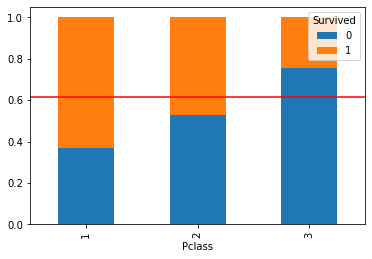

In [12]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

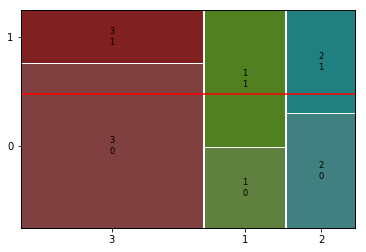

In [13]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

### 실습 : 시각화

* Sex --> Survived

In [14]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


* Embarked --> Survived

In [21]:
pd.crosstab(titanic['Survived'],titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [27]:
pd.crosstab(titanic['Survived'],titanic['Embarked'],normalize='index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.273529,0.088235,0.638235


Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


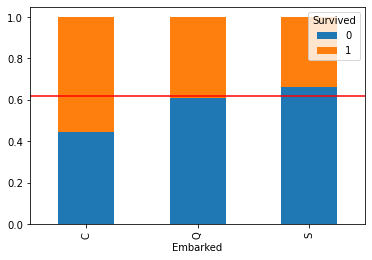

In [33]:
tmp = pd.crosstab(titanic['Embarked'],titanic['Survived'],normalize='index')
print(tmp)

tmp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(),color='r')
plt.show()

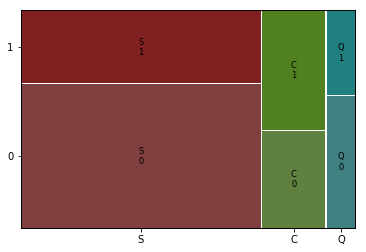

In [23]:
mosaic(titanic,['Embarked','Survived'])
plt.show()

* Title --> Survived

In [ ]:
# 세 범주로 그리려면...
mosaic(titanic, ['Sex','Pclass','Survived'])
plt.show()

## 4.수치화 : 카이제곱검정

* 카이제곱검정

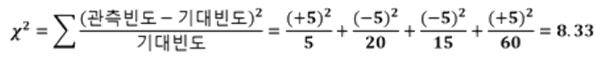

* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [ ]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

In [ ]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

### 실습
다음의 범주형 변수들에 대해서 관계를 살펴봅시다.

* Sex --> Survived

* Embarked --> Survived

* Title --> Survived

In [ ]:
# 한꺼번에 비교
vars = ['Pclass','Sex','Embarked','Title']

for v in vars :
    table = pd.crosstab(titanic['Survived'], titanic[v])
    result = spst.chi2_contingency(table, correction=False)
    print(v)
    print("카이제곱통계량 : {:.4f}".format(result[0]))
    print("p-value : {:.20f}".format(result[1]))
    print('--------------------------------------')


In [ ]:
# 위 세 변수(Sex, Embared, Title)중 어느 변수가 Survived와 가장 관련이 큰가요?
# 차트를 통해서 확인해 본 결과와 같은가요?

